# Animation
* https://github.com/JuliaLang/IJulia.jl/issues/107
* http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

In [1]:
using PyCall
using PyPlot
@pyimport matplotlib.animation as anim # First set up the figure, the axis, and the plot element we want to animate

INFO: Recompiling stale cache file /home/dymaxionkim/.julia/lib/v0.5/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/dymaxionkim/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


In [15]:
fig = figure()
ax = axes(xlim=(0, 2), ylim=(-2, 2))
global line = ax[:plot]([], [], lw=2)[1]

# initialization function: plot the background of each frame
function init()
    global line
    line[:set_data]([], [])
    return (line,None)
end

# animation function.  This is called sequentially
function animate(i)
    x = linspace(0, 2, 1000)
    y = sin(2 * pi * (x - 0.01 * i))
    global line
    line[:set_data](x, y)
    return (line,None)
end

# call the animator.  blit=True means only re-draw the parts that have changed.
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=true)

LoadError: PyError (:PyObject_Call) <class 'RuntimeError'>
RuntimeError('Julia exception: UndefVarError(:None)',)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 1193, in __init__
    TimedAnimation.__init__(self, fig, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 1037, in __init__
    *args, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 649, in __init__
    self._setup_blit()
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 935, in _setup_blit
    self._post_draw(None, self._blit)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 900, in _post_draw
    self._fig.canvas.draw_idle()
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py", line 2026, in draw_idle
    self.draw(*args, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/contextlib.py", line 77, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py", line 1700, in _idle_draw_cntx
    yield
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py", line 2026, in draw_idle
    self.draw(*args, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/backends/backend_agg.py", line 474, in draw
    self.figure.draw(self.renderer)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/artist.py", line 62, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py", line 1165, in draw
    self.canvas.draw_event(renderer)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/backend_bases.py", line 1809, in draw_event
    self.callbacks.process(s, event)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py", line 563, in process
    proxy(*args, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py", line 430, in __call__
    return mtd(*args, **kwargs)
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 661, in _start
    self._init_draw()
  File "/home/dymaxionkim/anaconda3/lib/python3.5/site-packages/matplotlib/animation.py", line 1224, in _init_draw
    self._drawn_artists = self._init_func()


In [16]:




#myanim[:save]("/tmp/sinplot.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

# call our new function to display the animation
#display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""", base64(open(readbytes,"/tmp/sinplot.mp4")),"""" type="video/mp4"></video>"""))






In [17]:
%pylab inline

The analogue of IPython's `%pylab` in Julia is to use the [PyPlot package](https://github.com/stevengj/PyPlot.jl), which gives a Julia interface to Matplotlib including inline plots in IJulia notebooks.   (The equivalent of `numpy` is already loaded by default in Julia.)

Given PyPlot, the analogue of `%pylab inline` is `using PyPlot`, since PyPlot defaults to inline plots in IJulia.

To enable separate GUI windows in PyPlot, analogous to `%pylab`, do `using PyPlot; pygui(true)`.   To specify a particular gui backend, analogous to `%pylab gui`, you can either do `using PyPlot; pygui(:gui); using PyPlot; pygui(true)` (where `gui` is `wx`, `qt`, `tk`, or `gtk`), or you can do `ENV["MPLBACKEND"]=backend; using PyPlot; pygui(true)` (where `backend` is the name of a Matplotlib backend, like `tkagg`).

For more options, see the PyPlot documentation.


In [19]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

LoadError: syntax: extra token "tempfile" after end of expression

* 2D : http://nbviewer.jupyter.org/github/tom26/JuliaFun/blob/master/2D%203-Body%20Problem.ipynb
* 3D : http://nbviewer.jupyter.org/github/tom26/JuliaFun/blob/master/3D%20n-body%20problem.ipynb

In [21]:
Pkg.add("ODE")

INFO: Cloning cache of DiffEqBase from https://github.com/JuliaDiffEq/DiffEqBase.jl.git
INFO: Cloning cache of ODE from https://github.com/JuliaDiffEq/ODE.jl.git
INFO: Cloning cache of Parameters from https://github.com/mauro3/Parameters.jl.git
INFO: Cloning cache of Polynomials from https://github.com/Keno/Polynomials.jl.git
INFO: Cloning cache of Ranges from https://github.com/JuliaArrays/Ranges.jl.git
INFO: Cloning cache of RecursiveArrayTools from https://github.com/ChrisRackauckas/RecursiveArrayTools.jl.git
INFO: Cloning cache of SimpleTraits from https://github.com/mauro3/SimpleTraits.jl.git
INFO: Installing DiffEqBase v0.7.0
INFO: Installing ODE v0.3.0
INFO: Installing Parameters v0.6.0
INFO: Installing Polynomials v0.1.2
INFO: Installing Ranges v0.0.1
INFO: Installing RecursiveArrayTools v0.1.2
INFO: Installing SimpleTraits v0.2.0
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of ODE
INFO: Use `Pkg.update()` to get the latest 

In [22]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of Images...
INFO: Computing changes...
INFO: Cloning cache of AxisArrays from https://github.com/JuliaArrays/AxisArrays.jl.git
INFO: Cloning cache of CatIndices from https://github.com/JuliaArrays/CatIndices.jl.git
INFO: Cloning cache of ComputationalResources from https://github.com/timholy/ComputationalResources.jl.git
INFO: Cloning cache of CustomUnitRanges from https://github.com/JuliaArrays/CustomUnitRanges.jl.git
INFO: Cloning cache of FFTViews from https://github.com/JuliaArrays/FFTViews.jl.git
INFO: Cloning cache of ImageAxes from https://github.com/JuliaImages/ImageAxes.jl.git
INFO: Cloning cache of ImageCore from https://github.com/JuliaImages/ImageCore.jl.git
INFO: Cloning cache of ImageFiltering from https://github.com/JuliaImages/ImageFiltering.jl.git
INFO: Cloning cache of ImageMetadata from https://github.com/JuliaImages/ImageMetadata.jl.git
INFO: Cloning cache of IndirectArrays from https://github.com/JuliaArrays/Indirect

In [23]:
using PyPlot
using ODE
using PyCall
@pyimport matplotlib.animation as anim

INFO: Precompiling module ODE.


In [24]:
function F(t,y)
    
    #Extract current position and velocity
    r1, v1 = y[1:2], y[3:4]
    r2, v2 = y[5:6], y[7:8]
    r3, v3 = y[9:10], y[11:12]
    
    
    #Give spatial derivatives
    dr1dt = v1
    dr2dt = v2
    dr3dt = v3
    
    
    #Work out velocity derivatives (ie accelerations)
    dv1dt = -(G*m2*(r1-r2)/(norm(r1-r2)^3) + G*m3*(r1-r3)/(norm(r1-r3)^3))
    dv2dt = -(G*m1*(r2-r1)/(norm(r2-r1)^3) + G*m3*(r2-r3)/(norm(r2-r3)^3))
    dv3dt = -(G*m1*(r3-r1)/(norm(r3-r1)^3) + G*m2*(r3-r2)/(norm(r3-r2)^3))
    
    #Combine back together into dydt vector
    dydt = [dr1dt,dv1dt,dr2dt,dv2dt,dr3dt,dv3dt]
    
    return dydt
end

F (generic function with 1 method)

In [26]:
#Set the planetary masses
m1 = 5
m2 = 4
m3 = 3

#Set the gravitational field strength
G = 1

#Set initial positions and velocities 
r10 = [1.01,-1];    v10 =  [0.0,0.0]
r20 = [1.0,3.0];    v20 =  [0.0,0.0]
r30 = [-2.0,-1.0];  v30 =  [0.0,0.0]

#Specify simulation time and steps per second ('steps per second' is only for animation purposes, as ode23s is an adaptive solver.)
tf = 50
stepsPerUnitTime = 500

#Solve the system
y0 = [r10,v10,r20,v20,r30,v30]
tspan = linspace(0,tf,tf*stepsPerUnitTime)
t,y = ode23s(F, y0, tspan; points=:specified);

#Extract the data into a useful form
ymat= hcat(y...)
r1x = ymat[1,:]
r1y = ymat[2,:]
r2x = ymat[5,:]
r2y = ymat[6,:]
r3x = ymat[9,:]
r3y = ymat[10,:]
r1x = reshape(r1x, length(r1x))
r1y = reshape(r1y, length(r1y))
r2x = reshape(r2x, length(r2x))
r2y = reshape(r2y, length(r2y))
r3x = reshape(r3x, length(r3x))
r3y = reshape(r3y, length(r3y));

LoadError: BoundsError: attempt to access 6-element Array{Array{Float64,1},1} at index [7:8]

In [27]:
#Find Axis Limits
xmin = minimum([r1x,r2x,r3x])
xmax = maximum([r1x,r2x,r3x])
xmin, xmax = xmin - 0.1(xmax-xmin), xmax+ 0.1*(xmax-xmin)
ymin = minimum([r1y,r2y,r3y])
ymax = maximum([r1y,r2y,r3y])
ymin, ymax = ymin - 0.1(ymax-ymin), ymax+ 0.1*(ymax-ymin)

#Construct Figure and Plot Data
fig = figure()
ax = plt.axes(xlim = (xmin,xmax),ylim=(ymin,ymax))
ax[:plot](r1x,r1y, "r-")
ax[:plot](r2x,r2y, "g-")
ax[:plot](r3x,r3y, "b-")
 
#Plot start and end points
ax[:plot](r1x[1],r1y[1], "ro")
ax[:plot](r1x[end],r1y[end], "rs")
ax[:plot](r2x[1],r2y[1], "go")
ax[:plot](r2x[end],r2y[end], "gs")
ax[:plot](r3x[1],r3y[1], "bo")
ax[:plot](r3x[end],r3y[end], "bs")

LoadError: UndefVarError: r1x not defined

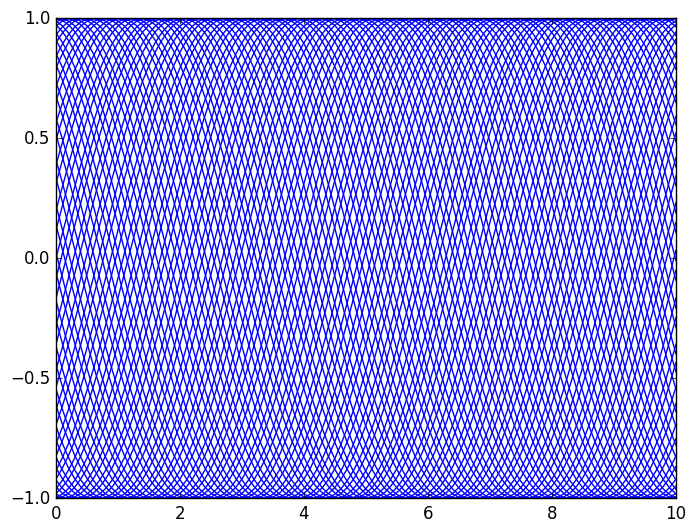

In [52]:
x = [0:0.1:10;];
for i = 0:62
    plot(x, sin(x+0.2*i), color="blue")
end


In [34]:
?Timer

search: Timer get_current_fig_manager time time_ns timedwait mtime ctime @timev



```
Timer(delay, repeat=0)
```

Create a timer that wakes up tasks waiting for it (by calling `wait` on the timer object) at a specified interval.  Times are in seconds.  Waiting tasks are woken with an error when the timer is closed (by `close`). Use `isopen` to check whether a timer is still active.

```
Timer(callback::Function, delay, repeat=0)
```

Create a timer to call the given `callback` function. The `callback` is passed one argument, the timer object itself. The callback will be invoked after the specified initial `delay`, and then repeating with the given `repeat` interval. If `repeat` is `0`, the timer is only triggered once. Times are in seconds. A timer is stopped and has its resources freed by calling `close` on it.


In [1]:
%%html
<script src="https://npmcdn.com/jupyter-js-widgets@~1.2.0/dist/embed.js"></script><script type="application/vnd.jupyter-embedded-widgets">{}</script>

In [2]:
a = 1

1